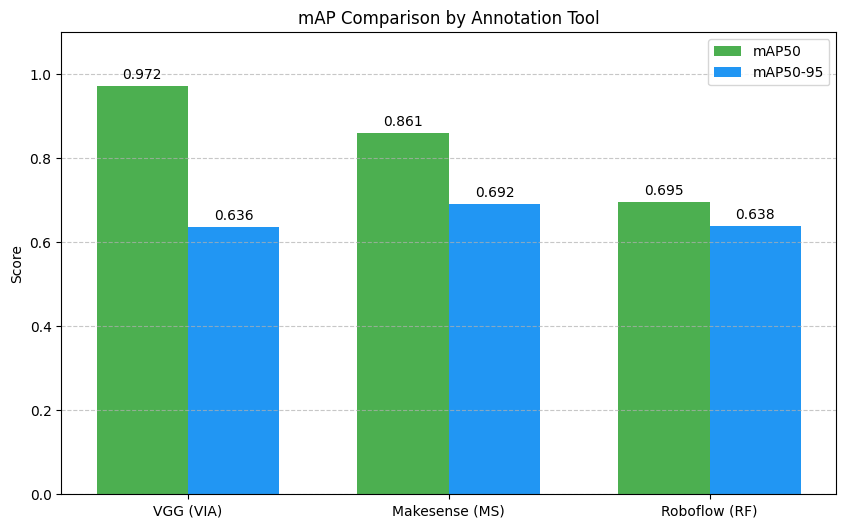

In [ ]:
# mAP Comparison (Bar Chart)
import matplotlib.pyplot as plt
import numpy as np

tools = ['VGG (VIA)', 'Makesense (MS)', 'Roboflow (RF)']
map50 = [0.972, 0.861, 0.695]
map50_95 = [0.636, 0.692, 0.638]

x = np.arange(len(tools))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, map50, width, label='mAP50', color='#4CAF50')
rects2 = ax.bar(x + width/2, map50_95, width, label='mAP50-95', color='#2196F3')

ax.set_ylabel('Score')
ax.set_title('mAP Comparison by Annotation Tool')
ax.set_xticks(x)
ax.set_xticklabels(tools)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
- VIA dominates in mAP50 (0.972) but MS leads slightly in mAP50-95 (0.692).
- RF lags in both metrics.

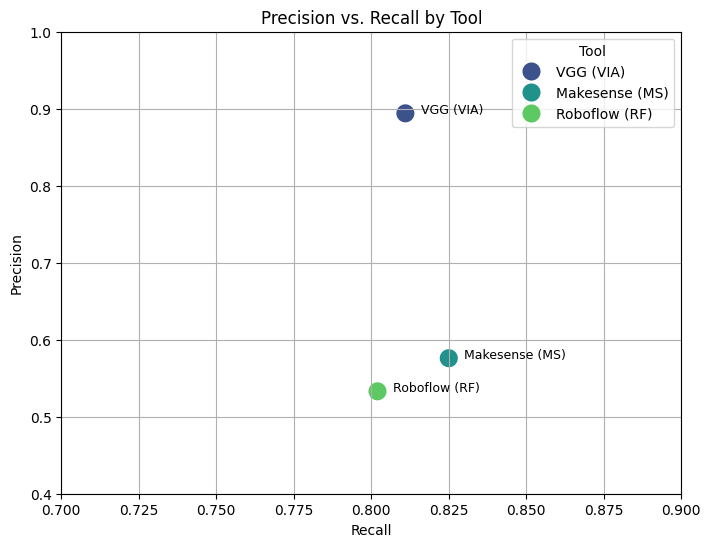

In [ ]:
# Precision-Recall Trade-off (Scatter Plot)
import seaborn as sns

data = {
    'Tool': ['VGG (VIA)', 'Makesense (MS)', 'Roboflow (RF)'],
    'Precision': [0.894, 0.576, 0.533],
    'Recall': [0.811, 0.825, 0.802]
}

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Recall', y='Precision', hue='Tool', s=200, palette='viridis')
plt.title('Precision vs. Recall by Tool')
plt.xlim(0.7, 0.9)
plt.ylim(0.4, 1.0)
plt.grid(True)

# Annotate points
for i, row in enumerate(data['Tool']):
    plt.text(data['Recall'][i]+0.005, data['Precision'][i], row,
             fontsize=9, ha='left')

plt.show()

Insight:
- VIA achieves high precision (few false positives).
- MS favors recall (fewer missed detections).

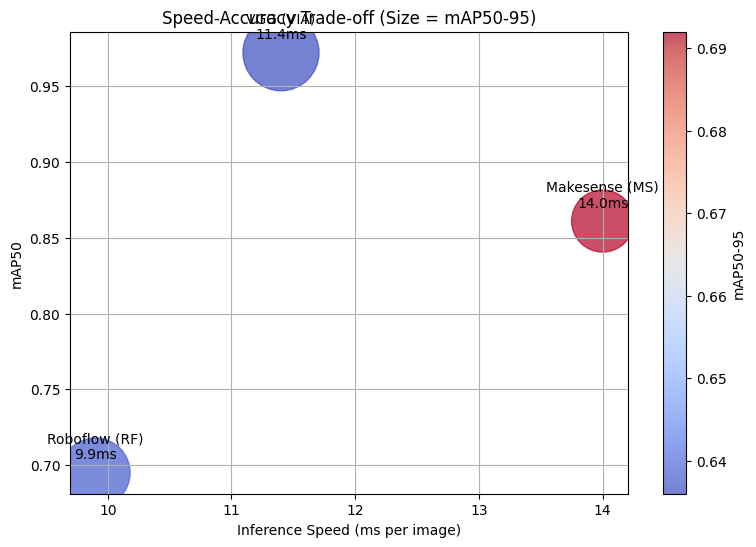

In [ ]:
# Speed vs. Accuracy (Bubble Chart)
speed = [11.4, 14.0, 9.9]  # ms/img
map50 = [0.972, 0.861, 0.695]

plt.figure(figsize=(9, 6))
scatter = plt.scatter(speed, map50, s=np.array([300, 200, 250])*10,
                      c=[0.636, 0.692, 0.638], cmap='coolwarm', alpha=0.7)

# Annotate
for i, tool in enumerate(tools):
    plt.annotate(f"{tool}\n{speed[i]}ms", (speed[i], map50[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.colorbar(scatter, label='mAP50-95')
plt.xlabel('Inference Speed (ms per image)')
plt.ylabel('mAP50')
plt.title('Speed-Accuracy Trade-off (Size = mAP50-95)')
plt.grid(True)
plt.show()

Insight:
- RF is fastest (9.9ms/img) but least accurate.
- VIA offers best accuracy at higher latency.



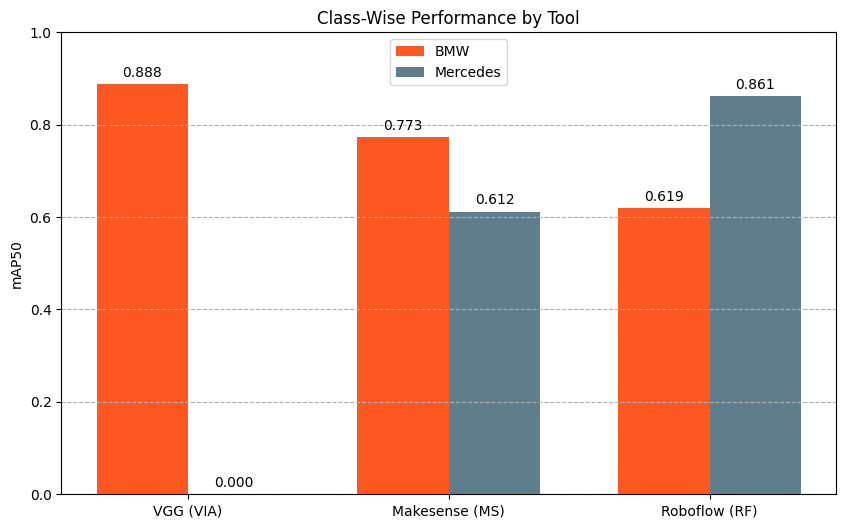

In [ ]:
# Class-Wise mAP50 (Grouped Bar Chart)
bmw_map = [0.888, 0.773, 0.619]
merc_map = [None, 0.612, 0.861]  # VIA's Mercedes data missing

x = np.arange(len(tools))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, bmw_map, width, label='BMW', color='#FF5722')
rects2 = ax.bar(x + width/2, [0 if v is None else v for v in merc_map], width,
                label='Mercedes', color='#607D8B')

ax.set_ylabel('mAP50')
ax.set_title('Class-Wise Performance by Tool')
ax.set_xticks(x)
ax.set_xticklabels(tools)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')

plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--')
plt.show()

Insight:
- RF excels in Mercedes detection (mAP50=0.861) but struggles with BMW.
- VIA shows robust BMW performance.

Key Takeaways from Visualizations
*   VIA is best for high-accuracy projects.
*   RF is ideal for real-time applications (fastest inference).
*   MS offers a balance but needs precision improvements.







